In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_red = pd.read_csv("data/winequality-red.csv", sep=";")
df_white = pd.read_csv("data/winequality-white.csv", sep=";")

df_red = df_red.dropna()
df_white = df_white.dropna()
features = df_red.columns
df_red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [3]:
df_white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


As expected, there's a lot of "mediocre" wine out there, both white and red. But much fewer instances of really terrible or outstanding wines

Text(0.5, 0, 'Quality')

<Figure size 1200x300 with 0 Axes>

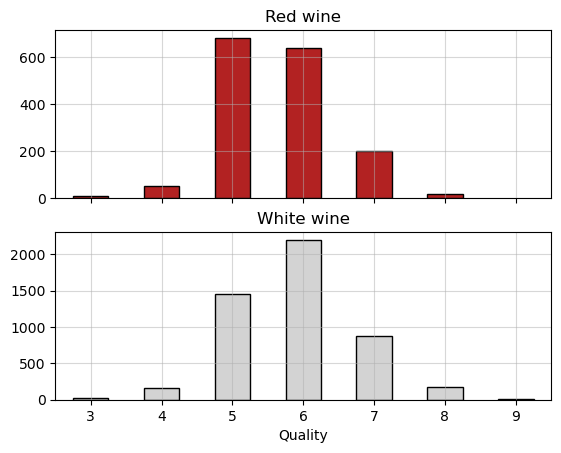

In [4]:
plt.figure(figsize=(12, 3))
fig, ax = plt.subplots(2, sharex=True)
df_red["quality"].value_counts(ascending=True).sort_index().plot.bar(color='firebrick', rot=0, edgecolor='k', ax=ax[0])
ax[0].set_title("Red wine")
ax[0].grid('on', alpha=.5)
df_white["quality"].value_counts(ascending=True).sort_index().plot.bar(color='lightgray', rot=0, edgecolor='k', ax=ax[1])
ax[1].set_title("White wine")
ax[1].grid('on', alpha=.5)
ax[1].set_xlabel("Quality")

In [5]:
df_compare = df_red[(df_red["quality"] == 3) | (df_red["quality"] == 8)]

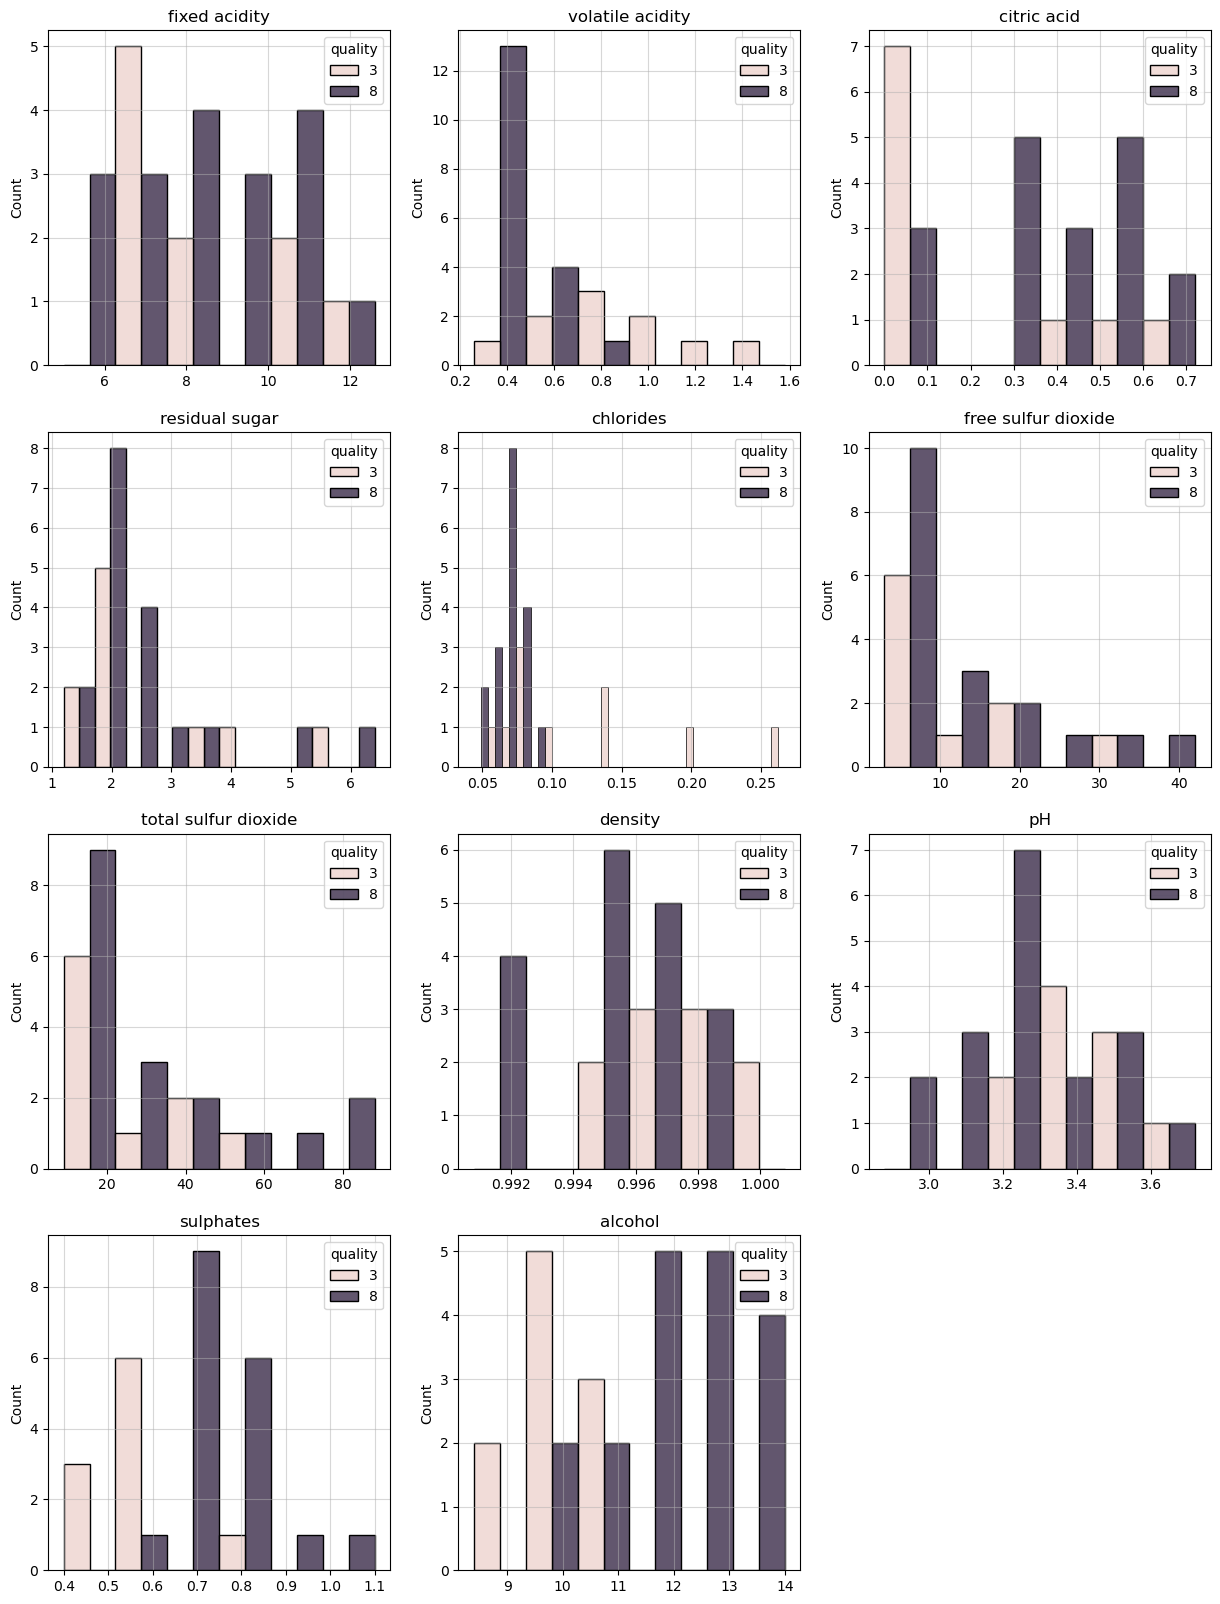

In [7]:
plt.figure(figsize = (15, 20))
for i, col in enumerate(df_compare.columns[:-1], 1):
    plt.subplot(4, 3, i)
    sns.histplot(x = df_compare[col], hue=df_compare["quality"], multiple="dodge")
    plt.title(col)
    plt.xticks(rotation=0)
    plt.xlabel("")
    plt.plot()
    plt.grid('on', alpha=.5)

<Axes: xlabel='quality', ylabel='alcohol'>

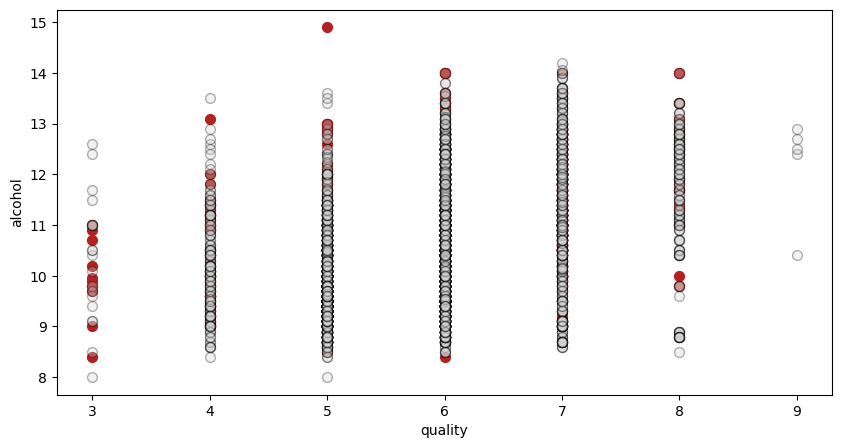

In [8]:
ax = df_red.plot.scatter(x="quality", y="alcohol", color='firebrick', s=50, figsize=(10,5))
df_white.plot.scatter(x="quality", y="alcohol", color='lightgray', edgecolor='k', ax=ax, s=50, alpha=.3)

In [10]:
df_red.loc[:, 'wine'] = 'red'
df_white.loc[:, 'wine'] = 'white'
df_all = pd.concat([df_red, df_white])

Interestingly, the alcohol content of a wine correlates with its quality score. Especially for red wine, this correlation is prominent on the lower and upper ends of the quality scale. For white wines, on the other hand, the correlation appears to be weaker. The correlation is reversed for the lowest quality white wines; higher alcohol content indicates lower quality. This could be the byproduct of many high quality, and outstanding off dry Rieslings from Mosel region with low alcohol content.

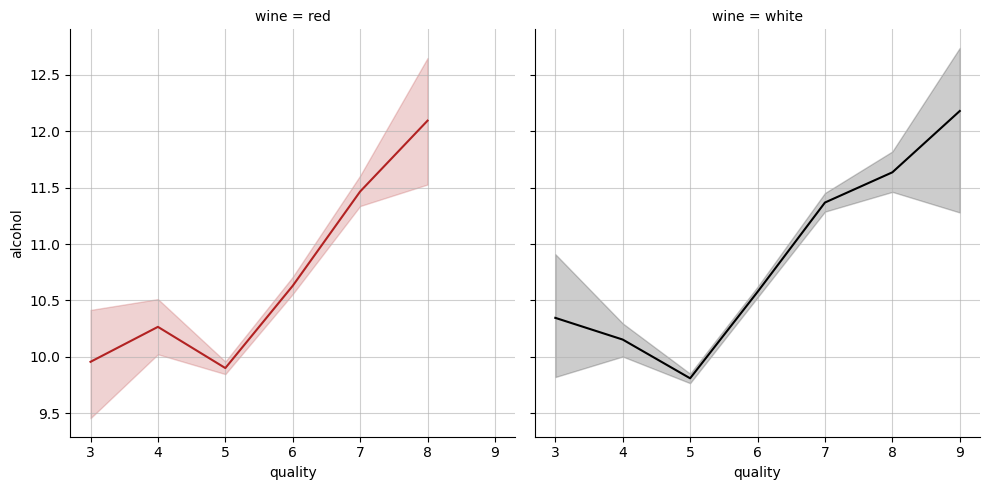

In [11]:
g = sns.relplot(x='quality',y='alcohol',kind='line', data=df_all, col="wine", hue="wine", palette=['firebrick', 'black'], legend=False)

for ax in g.axes.flatten():
    ax.grid('on', alpha=.6)